In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [4]:
log_returns = np.log(1 + data.pct_change())

In [5]:
r = 0.025

In [6]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [7]:
stdev = stdev.values
stdev

array([0.17655022])

In [8]:
T = 1.0
t_intervals = 250
delta_t = T / t_intervals

iterations = 10000

In [9]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [10]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

In [11]:
S

array([[ 79.71233368,  79.71233368,  79.71233368, ...,  79.71233368,
         79.71233368,  79.71233368],
       [ 79.18474826,  79.29315037,  80.65739875, ...,  78.97711083,
         78.49651682,  80.4427376 ],
       [ 79.58935645,  79.31088255,  80.85916932, ...,  77.92595277,
         78.352743  ,  79.86829795],
       ...,
       [ 72.28664035,  98.01918215,  86.58971175, ...,  74.91526016,
         93.3172317 ,  81.87079379],
       [ 72.444619  ,  98.41440661,  85.63984462, ...,  75.52004204,
         93.0218902 ,  82.30277254],
       [ 73.51544365, 100.0372768 ,  87.71761098, ...,  74.37773602,
         93.88136414,  81.94465685]])

In [12]:
S.shape

(251, 10000)

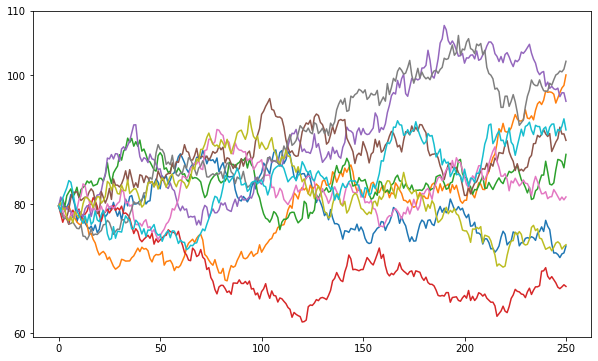

In [13]:
plt.figure(figsize=(10,6))
plt.plot(S[:, :10])

In [14]:
p = np.maximum(S[-1] - 110, 0)

In [15]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
p.shape

(10000,)

In [17]:
C = np.exp(-r * T) * np.sum(p) / iterations
C

0.32546539418423803